In [ ]:
from comands import *
import load as ld
import matplotlib.pyplot as plt
from matplotlib import collections  as mc

In [ ]:
ld.LoadAndFind.__doc__ #dokumentacja klasy 

# Check system 

In [ ]:
Check_system()

# Fourier transformation 

In [ ]:
Fourier_transformation(' ./data/sdB93.dane') #calculate ft 

In [ ]:
noise = Calculate_the_noise_level() # calculate noise by 4 sigma. If you want change the value You mast go to comands file 
noise 

In [ ]:
noise = 0.03709325

# Loading data 

In [ ]:
Load = ld.LoadAndFind() # it is example how to laod data with module 

In [ ]:
Load.peaks_periods

# Plotting data 

In [ ]:
#This generates an ipywidget that renders plots in a control. Multiple plots and zooming are supported
%matplotlib widget

## Plotting chart with variable level noise

In [ ]:
Split = ld.SplitData()

In [ ]:
figure_0 = plt.figure(figsize=(10, 10))
axis_0 = figure_0.subplots()
axis_0.set(xlabel='Frequencies [c/d]', ylabel='Amplitude [ppt]')
lc = mc.LineCollection(Split.lines, colors='red', linewidths=2)
axis_0.add_collection(lc)
axis_0.autoscale()
axis_0.grid()
axis_0.plot(Load.frequencies, Load.ppt, zorder=-10)
plt.savefig('transformat_fourier_frequencies_with_noise.eps', format='eps')


## Plotting chart with one level noise 


In [ ]:
figure_1 = plt.figure(figsize=(10, 10)) #plotting maxima in frequencies
axis_1 = figure_1.subplots()
axis_1.plot(Load.frequencies, Load.ppt, color='red')
axis_1.scatter(Load.peak_position, Load.height, color='g', s=10, marker='D', label='Identified signal')
axis_1.axhline(y=noise, color='blue', linestyle='-', linewidth=1.5)
axis_1.legend()
axis_1.grid()

##  Plotting maxima in periods

In [ ]:
figure_2 = plt.figure() #plotting maxima in periods
axis_2 = figure_2.subplots()
axis_2.plot(Load.periods[-575000:], Load.ppt[-575000:], color='red')
axis_2.scatter(Load.peaks_periods[2:], Load.height[2:], color ='green', s =10, marker ='D', label ='Identified signal')
axis_2.set(xlabel='Periods [s]', ylabel='Amplitude [ppt]')
axis_2.legend()
axis_2.grid()
plt.savefig('identified_signal_in_period.eps', format='eps')

## Plotting histogram to all data 

In [ ]:
Histograms = ld.DistanceAndHistograms()

In [ ]:
limiting_data = Histograms.limiting(20, 600) #load limiting data to histiogram for 20 sice 600 distance 
limiting_data

In [ ]:
figure_3 = plt.figure(figsize=(10, 10))
axis_3 = figure_3.subplots()
axis_3.hist(limiting_data, bins=50, alpha=0.7, facecolor='green')
axis_3.set_xlabel('Period spacing')
axis_3.set_ylabel('Number of occurreuces')
axis_3.grid()
plt.savefig('histogram_to_all_data.eps', format='eps')

## Potting histograms to $l_2$ (140 seconds distanse)

In [ ]:
limiting_data_1 = Histograms.limiting(100, 300)

In [ ]:
xfit_1 = Histograms.fitting_gauss(limiting_data_1, start_interval=0.03, end_interval=0.5, start_point_fit=120, end_point_fit=190)[0]
yfit_1 = Histograms.fitting_gauss(limiting_data_1, start_interval=0.03, end_interval=0.5, start_point_fit=120, end_point_fit=190)[1]
x0_1 = Histograms.fitting_gauss(limiting_data_1, start_interval=0.03, end_interval=0.5, start_point_fit=120, end_point_fit=190)[2]
sigma_1 = Histograms.fitting_gauss(limiting_data_1, start_interval=0.03, end_interval=0.5, start_point_fit=120, end_point_fit=190)[3]

#matching parameters

In [ ]:
x0_1, sigma_1

In [ ]:
figure_4 = plt.figure(figsize=(10, 10)) #plotting result
axis_4 = figure_4.subplots()
axis_4.hist(limiting_data_1, bins=50, density=1, alpha=0.7, facecolor='green')
axis_4.plot(xfit_1, yfit_1, color='blue')
axis_4.set(xlabel='Period spacing', ylabel='Number of occurreuces', title=None)
axis_4.grid()
axis_4.legend(labels=['Gauss function', 'Data'])
plt.savefig('histogram_l2_gauss.eps', format='eps')

## Potting histograms to $l_1$ (250 seconds distanse)

In [ ]:
limiting_data_2 = Histograms.limiting(200, 350)

In [ ]:
xfit_2 = Histograms.fitting_gauss(limiting_data_2, start_interval=0.2, end_interval=0.7, start_point_fit=240, end_point_fit=300)[0]
yfit_2 = Histograms.fitting_gauss(limiting_data_2, start_interval=0.2, end_interval=0.7, start_point_fit=240, end_point_fit=300)[1]
x0_2 = Histograms.fitting_gauss(limiting_data_2, start_interval=0.2, end_interval=0.7, start_point_fit=240, end_point_fit=300)[2]
sigma_2 = Histograms.fitting_gauss(limiting_data_2, start_interval=0.2, end_interval=0.7, start_point_fit=240, end_point_fit=300)[3]

#matching parameters

In [ ]:
x0_2, sigma_2

In [ ]:
figure_5 = plt.figure(figsize=(10, 10)) #plotting result
axis_5 = figure_5.subplots()
axis_5.hist(limiting_data_2, bins=50, density=1, alpha=0.7, facecolor='green')
axis_5.plot(xfit_2, yfit_2, color='blue')
axis_5.set(xlabel='Period spacing', ylabel='Number of occurreuces', title=None)
axis_5.grid()
axis_5.legend(labels=['Gauss function', 'Data'])
plt.savefig('histogram_l1_gauss.eps', format='eps')

## Potting histograms to $l_3$ if exist (80 seconds distanse)

In [ ]:
limiting_data_3 = Histograms.limiting(50, 100)

In [ ]:
xfit_3 = Histograms.fitting_gauss(limiting_data_3, start_interval=0.1, end_interval=0.7, start_point_fit=70, end_point_fit=85, bins=15)[0]
yfit_3 = Histograms.fitting_gauss(limiting_data_3, start_interval=0.1, end_interval=0.7, start_point_fit=70, end_point_fit=85, bins=15)[1]
x0_3 = Histograms.fitting_gauss(limiting_data_3, start_interval=0.1, end_interval=0.7, start_point_fit=70, end_point_fit=85, bins=15)[2]
sigma_3 = Histograms.fitting_gauss(limiting_data_3, start_interval=0.1, end_interval=0.7, start_point_fit=70, end_point_fit=85, bins=15)[3]

##matching parameters

In [ ]:
x0_3, sigma_3

In [ ]:
figure_6 = plt.figure(figsize=(10, 10)) #plotting result
axis_6 = figure_6.subplots()
axis_6.hist(limiting_data_3, bins=15, density=1, alpha=0.7, facecolor='green')
axis_6.plot(xfit_3, yfit_3, color='blue')
axis_6.set(xlabel='Period spacing', ylabel='Number of occurreuces', title=None)
axis_6.grid()
axis_6.legend(labels=['Gauss function', 'Data'])
axis_6.set_xlim([65, 90])
plt.savefig('histogram_l3_gauss.eps', format='eps')

# Assigning the values of $l_1$, $l_2$ and $l_3$ to the individual peaks

In [ ]:
lista = ld.Mods(x0_1, sigma_1, x0_2, sigma_2, x0_3, sigma_3, Load.peaks_periods)
lista


In [ ]:
type(lista)

In [ ]:
l_1 = lista.loc[lambda lista: lista[3] == '1 ']
L_1 = list(l_1[1])
l_2 = lista.loc[lambda lista: lista[3] == '2 ']

In [ ]:
len(l_2)

In [ ]:
figure_2 = plt.figure() #plotting axis x form data in periods
ax1 = figure_2.subplots()


el1x= l_2[1]
#el1y=[0.25] * len(el1x)
el1x_do_petli = el1x[0]
el1x_do1 = []
el1y = []

for i in range(64):
    el1x_do1.append((3645.617326 - 5 * 272.62)+ i * 272.62)
    el1y.append(0.25)

el2x= l_1[1]
# el2y=[0.22] * len(el2x)
el2y = []
el2x_do_petli = 5022.27539 - 18 * 151.92
el2x_do1 = []

for i in range(56):
    el2x_do1.append(el2x_do_petli + i * 151.92)
    el2y.append(0.22)

el3x = [6327.057121, 6326.45094, 6325.773764, 6247.705573]
el3y = [0.20] * 4

ax1.scatter(el1x_do1,el1y, marker='.', color='blue', label='Mode $\ell_1$')
ax1.scatter(el2x_do1,el2y, marker='.', color='green', label='Mode $\ell_2$')
ax1.scatter(el3x,el3y, marker='.', color='violet', label='Mode $\ell_3$')
ax1.plot(Load.periods[-590000:], Load.ppt[-590000:], label='Fourier Transform', color='red')
ax1.axhline(y=noise, color='blue', linestyle='-', linewidth=1.5)
ax1.set_xlim([2000, 8000])


ax1.grid()
ax1.set_xlabel("Periods [s]")
ax1.set_ylabel("Amplitude [ppt]")
ax1.legend()
#plt.xlim([0, 7500])
plt.savefig('ehhhhh.eps', format='eps')
plt.show()

# Corfirmation of correct designation 

In [ ]:
Confirm = ld.Confirm()

In [ ]:
load_data = Confirm.run_fourier_transformation()

In [ ]:
figure_7 = plt.figure(figsize=(9, 7)) #plotting axis x form data in periods
axis_7 = figure_7.subplots()
# axis_7.set_ylim(0,0.009)
axis_7.set_xlim(0, 0.014)
axis_7.axvline(x=1 / 140, color='b', linestyle='-', linewidth=1, label = '$\sigma_{1}$')
axis_7.axvline(x=1 / 270, color='g', linestyle='-', linewidth=1, label = '$\sigma_{2}$')
# axis_7.axvline(x=1 / 102.8, color='orange', linestyle='-', linewidth=1, label = '$\sigma_{3b}$')
axis_7.set_xlabel('Fourier transform from seconds dependent amplitude spectrum for frequency [s]')
axis_7.set_ylabel('Amplitude [ppt]')
axis_7.legend()
axis_7.grid()
axis_7.plot(load_data[0],load_data[1], color='red')
plt.savefig('2nd_ft.eps', format='eps')

# Converting data into other units

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np

In [2]:
dane = pd.read_csv('./data/sdB93.dane', sep='\s+', header=None)
czas = dane[0]
natezenie = dane[1]

In [ ]:
import numpy as np
rand = np.random.default_rng(42)
t = 100 * rand.random(100)
y = np.sin(2 * np.pi * t) + 0.1 * rand.standard_normal(100)

In [3]:
%matplotlib widget

In [10]:
from astropy.timeseries import LombScargle

frequency, power = LombScargle(czas, natezenie, normalization='standard').autopower(minimum_frequency=0, maximum_frequency=50)

In [ ]:
len(frequency)

In [18]:
power_1 = np.sqrt(power[1:] / 0.0263683484161726)
norm = np.linalg.norm(power_1)
normal_array = power_1 / norm

In [22]:
max(power)
min(power_1)

1.2025684090586422e-05

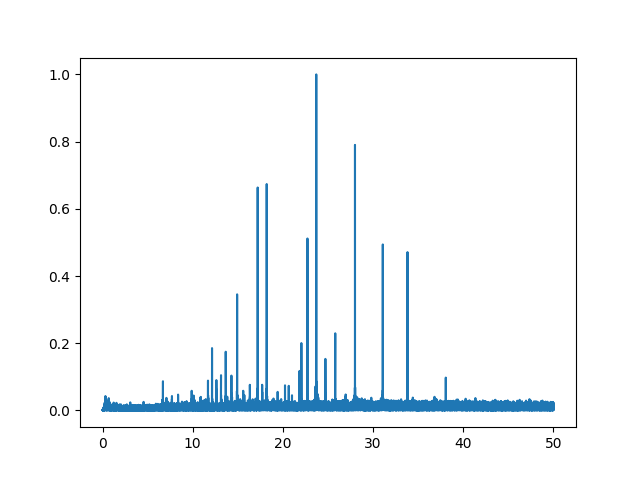

In [20]:
plt.clf()
plt.plot(frequency[1:], power_1)
plt.show()